In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Effects on Mind Wandering: White Noise vs Ambient Noise_May 9, 2024_05.36.csv'
data = pd.read_csv(file_path, skiprows=1)
data.columns = [
    'StartDate', 'EndDate', 'ResponseType', 'Progress', 'Duration', 'Finished', 
    'RecordedDate', 'ResponseID', 'DistributionChannel', 'UserLanguage', 'Introduction', 
    'InformedConsent', 'Gender', 'MindWanderingExperience', 'NoiseExperience', 
    'Engagement', 'MainIdea', 'Events', 'Characters', 'SoundHelpful', 'MindWandering', 'Group'
]
data['Engagement'] = data['Engagement'].replace('{"ImportId":"QID37"}', pd.NA)
data['MindWandering'] = data['MindWandering'].replace('{"ImportId":"QID40"}', pd.NA)
data['Engagement'] = pd.to_numeric(data['Engagement'], errors='coerce')
data['MindWandering'] = pd.to_numeric(data['MindWandering'], errors='coerce')
data = data.dropna(subset=['Engagement', 'MindWandering', 'Group'])

mean_engagement_ambient = data[data['Group'] == 'AmbientNoise']['Engagement'].mean()
variance_engagement_ambient = data[data['Group'] == 'AmbientNoise']['Engagement'].var()
std_engagement_ambient = data[data['Group'] == 'AmbientNoise']['Engagement'].std()

mean_engagement_white = data[data['Group'] == 'WhiteNoise']['Engagement'].mean()
variance_engagement_white = data[data['Group'] == 'WhiteNoise']['Engagement'].var()
std_engagement_white = data[data['Group'] == 'WhiteNoise']['Engagement'].std()

data_dict = {
    'Noise Condition': ['Ambient Noise', 'White Noise'],
    'Mean Engagement': [mean_engagement_ambient, mean_engagement_white],
    'Standard Deviation': [std_engagement_ambient, std_engagement_white],
    'Variance': [variance_engagement_ambient, variance_engagement_white]
}

table_df = pd.DataFrame(data_dict)
print(table_df)


  Noise Condition  Mean Engagement  Standard Deviation  Variance
0   Ambient Noise              3.5            1.243163  1.545455
1     White Noise              6.5            1.951331  3.807692


<function matplotlib.pyplot.show(close=None, block=None)>

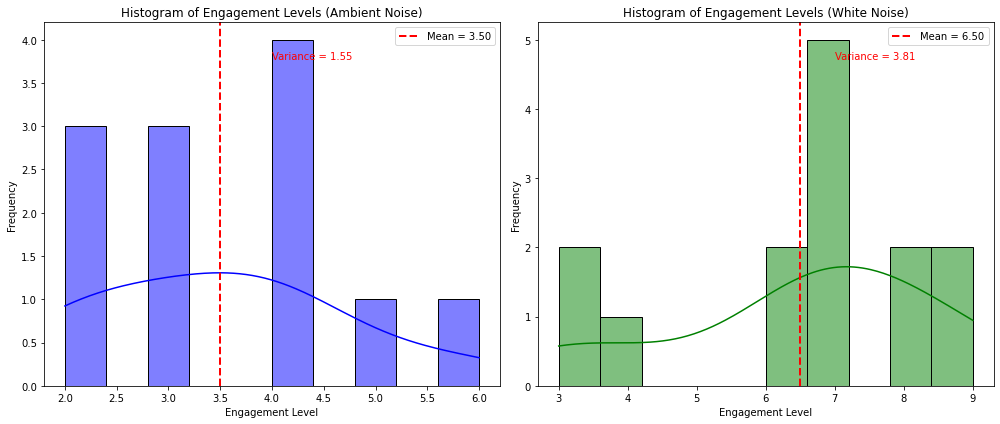

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_engagement_ambient = data[data['Group'] == 'AmbientNoise']['Engagement'].mean()
variance_engagement_ambient = data[data['Group'] == 'AmbientNoise']['Engagement'].var()

mean_engagement_white = data[data['Group'] == 'WhiteNoise']['Engagement'].mean()
variance_engagement_white = data[data['Group'] == 'WhiteNoise']['Engagement'].var()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[data['Group'] == 'AmbientNoise']['Engagement'], bins=10, kde=True, color='blue')
plt.axvline(mean_engagement_ambient, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_engagement_ambient:.2f}')
plt.text(mean_engagement_ambient + 0.5, plt.ylim()[1] * 0.9, f'Variance = {variance_engagement_ambient:.2f}', color='red')
plt.title('Histogram of Engagement Levels (Ambient Noise)')
plt.xlabel('Engagement Level')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data[data['Group'] == 'WhiteNoise']['Engagement'], bins=10, kde=True, color='green')
plt.axvline(mean_engagement_white, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_engagement_white:.2f}')
plt.text(mean_engagement_white + 0.5, plt.ylim()[1] * 0.9, f'Variance = {variance_engagement_white:.2f}', color='red')
plt.title('Histogram of Engagement Levels (White Noise)')
plt.xlabel('Engagement Level')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show

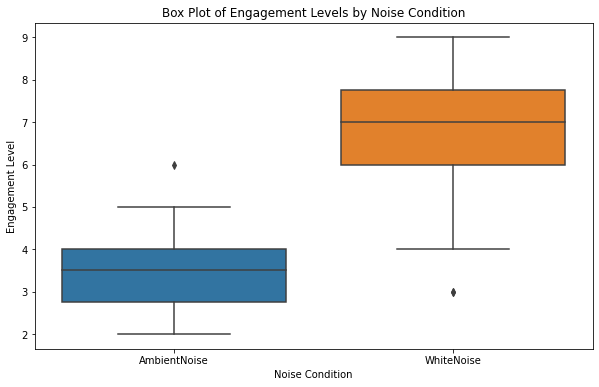

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

engagement_white_noise = data[data['Group'] == 'WhiteNoise']['Engagement']
engagement_ambient_noise = data[data['Group'] == 'AmbientNoise']['Engagement']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Engagement', data=data)
plt.title('Box Plot of Engagement Levels by Noise Condition')
plt.xlabel('Noise Condition')
plt.ylabel('Engagement Level')
plt.show()